<a href="https://colab.research.google.com/github/girirohan36/Bite-sized-Machine-Learning/blob/master/RateBeer_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analytics for Unstructured Data : Assignment 2

Beer Recomendation System

# Team Members
1.Soham Siddhant Bidyadhar - (sb67347)

2.Agnitra Das - (ad55985)

3.Sarah Lee - (cl45274)

4.Jyoti Kumari - (jk52725)

5.Saaket Joshi - (sj778)

6.Rohan Giri - (rg52539)


# TASK A

In [ ]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
service = Service(ChromeDriverManager().install())
chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=chrome_options)

In [ ]:
website = "https://www.ratebeer.com/beer-ratings/0/1/"
driver.get(website)
time.sleep(10)
product_names = []
product_reviews = []
user_ratings = []


for i in range(99):
    product_elements = driver.find_elements(by=By.XPATH, value='//tr/td[2]/a')
    for i in product_elements:
        product_names.append(i.text)

    rating_elements = driver.find_elements(by=By.XPATH, value='//tr/td[2]/span[@class="uas"]')
    for i in rating_elements:
        user_ratings.append(i.text)

    review_elements = driver.find_elements(by=By.XPATH, value='//tr/td[2]/div[2]')
    for i in review_elements:
        product_reviews.append(i.text)

    driver.find_element(by=By.XPATH, value='//a/img[@alt="next"]').click()

driver.quit()



In [ ]:
df = pd.DataFrame({'product_name' : product_names, 'product_review': product_reviews, 'user_rating': user_ratings})
df.tail()

,product_name,product_review,user_rating
1480,Troubadour Westkust,"W aromacie nuty espresso, żywiczne, gorzkiej c...",3.6
1481,Central Waters Brewer's Reserve Vanilla Bean S...,"(Draught at Beer Temple, Amsterdam, 20 July 20...",4.3
1482,Verdant Helles,Draught@TCBW2022. Yellowish golden colour with...,3.0
1483,Beer Church Crooked Cross,Golden with a medium sized white head. Cracker...,2.2
1484,HaandBryggeriet Spontan Saison,Hazed golden in the glass and a small head Fin...,3.8


In [ ]:
df.to_csv("RateBeer Scraped Data.csv", index=False)

# TASK B

In [ ]:
import pandas as pd
from collections import defaultdict, Counter
from itertools import combinations
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

# Load data
df = pd.read_csv('RateBeer Scraped Data.csv')  # Update to your actual CSV file path

# Load the mapping CSV
mapping_df = pd.read_csv('Beer attributes mapping.csv')  # Update to your actual mapping CSV file path

# Convert the mapping CSV into a dictionary
attribute_mapping = dict(zip(mapping_df['Word'], mapping_df['Attribute']))

# Step 1: Preprocess the data (with stopwords removal)
def preprocess_text(text):
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip().lower()

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in sklearn_stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['product_review'].apply(preprocess_text)

# Step 2: Replace words in reviews with their corresponding attributes using the mapping
def replace_with_attributes(review, mapping):
    words = review.split()
    replaced_review = [mapping.get(word, word) for word in words]  # Replace words if they are in the mapping
    return ' '.join(replaced_review)

df['mapped_review'] = df['cleaned_review'].apply(lambda review: replace_with_attributes(review, attribute_mapping))

# Step 3: Word Frequency Analysis (using raw counts on mapped reviews)
def word_frequency(df, column='mapped_review'):
    word_counter = Counter()

    for review in df[column]:
        words_in_review = set(review.split())  # Ensure each word is counted once per post
        word_counter.update(words_in_review)

    return word_counter

# Get the word frequencies from the mapped reviews
word_freq = word_frequency(df)

# Sort words by frequency and get the top 50 words
sorted_word_freq = word_freq.most_common()
top_100_words = sorted_word_freq[:100]

# Step 4: Display top 50 words by raw frequency
print("Top 100 Words by Frequency count (after mapping):")
for word, freq in top_100_words:
    print(f"{word}: {freq}")

Top 100 Words by Frequency count (after mapping):
color: 1119
texture: 1034
foamy: 968
aroma: 708
sweet: 444
bitter: 440
malty: 440
fruity: 383
hoppy: 306
pours: 301
nice: 256
bottle: 248
clear: 218
flavour: 213
ml: 199
notes: 191
good: 188
beer: 186
hops: 186
tap: 185
nose: 182
orange: 179
flavor: 178
bit: 171
small: 164
colour: 154
mild: 148
pour: 147
slightly: 139
pale: 131
bodied: 131
palate: 126
malts: 126
gold: 121
chocolate: 121
quite: 120
tropical: 111
moderate: 108
hop: 107
lacing: 107
beige: 106
floral: 103
tart: 93
soft: 93
decent: 92
vanilla: 92
cloudy: 91
lemon: 91
like: 89
little: 89
grapefruit: 83
touch: 81
yeast: 80
bread: 79
smooth: 79
grass: 78
oz: 77
big: 76
coffee: 76
pine: 76
average: 75
oak: 75
alcohol: 74
bourbon: 71
slight: 69
tan: 69
cask: 68
earthy: 66
poured: 65
sour: 65
mango: 64
long: 64
lots: 63
hints: 63
aromas: 63
lasting: 63
clean: 62
fine: 62
herbal: 62
roasted: 61
frothy: 61
brewery: 61
balanced: 60
deep: 59
grain: 59
ok: 59
juicy: 58
bright: 57
overa

In [ ]:
# Step 5: Extract the top 10 attributes from the word list along with their counts
top_10_attributes_with_counts = [(word, freq) for word, freq in sorted_word_freq if word in attribute_mapping.values()][:10]

print("\nTop 10 Attributes by Frequency and their Counts:")
for attr, count in top_10_attributes_with_counts:
    print(f"{attr}: {count}")


Top 10 Attributes by Frequency and their Counts:
color: 1119
texture: 1034
foamy: 968
aroma: 708
bitter: 440
malty: 440
fruity: 383
hoppy: 306
robust: 57


In [ ]:
# Step 6: Lift Analysis with proximity check (find which words co-occur within 5 words and compute raw lift values)
def compute_lift(df, words, proximity_window=5, min_occurrences=1):
    co_occurrence = defaultdict(int)
    total_reviews = len(df)

    # Iterate over each review and check word co-occurrences within the proximity window
    for review in df['mapped_review']:
        words_in_review = review.split()  # Keep the review as a list of words for position checks

        for word1, word2 in combinations(words, 2):
            # Get positions of word1 and word2 in the review
            positions_word1 = [i for i, w in enumerate(words_in_review) if w == word1]
            positions_word2 = [i for i, w in enumerate(words_in_review) if w == word2]

            # Check if word1 and word2 are within the specified proximity window
            for pos1 in positions_word1:
                for pos2 in positions_word2:
                    if abs(pos1 - pos2) <= proximity_window:
                        co_occurrence[(word1, word2)] += 1
                        break  # Stop after the first valid co-occurrence in this review

    # Compute lift for each word pair
    lift_values = []
    for (word1, word2), count in co_occurrence.items():
        if count >= min_occurrences:
            p_a = word_freq[word1] / total_reviews  # Probability of word1
            p_b = word_freq[word2] / total_reviews  # Probability of word2
            p_ab = count / total_reviews  # Probability of both words co-occurring within proximity
            lift = p_ab / (p_a * p_b) if p_a * p_b > 0 else 0  # Avoid division by zero
            lift_values.append([word1, word2, count, lift])

    # Convert to a DataFrame for easy display
    lift_df = pd.DataFrame(lift_values, columns=['Word 1', 'Word 2', 'Co-occurrence', 'Lift'])
    return lift_df

# Step 7: Compute lift with proximity window and display top 10 lift value pairs for the top 10 attributes
proximity_window = 5  # You can set this to 5 or 7 based on your preference
top_10_attributes = [word for word, freq in top_10_attributes_with_counts]
lift_df = compute_lift(df, top_10_attributes, proximity_window=proximity_window)

# Display top 10 lift value pairs (sorted by Lift)
print(f"\nTop 10 Lift Value Pairs for Top 10 Attributes (within {proximity_window} words, sorted by Lift):")
top_lift_df = lift_df.sort_values(by='Lift', ascending=False).head(10)
print(top_lift_df[['Word 1', 'Word 2', 'Lift']])


Top 10 Lift Value Pairs for Top 10 Attributes (within 5 words, sorted by Lift):
     Word 1  Word 2      Lift
1   texture  bitter  2.291344
22   fruity   hoppy  2.192060
9     color   foamy  2.081099
6   texture   malty  1.674444
29    malty  robust  1.657895
2   texture  fruity  1.548664
10    color   aroma  1.535137
21  texture   hoppy  1.464330
11    foamy   aroma  1.202571
8     malty  fruity  1.163185


In [ ]:
# Step 8: Generate a Lift Matrix for the top 10 attributes
def generate_lift_matrix(lift_df, attributes):
    lift_matrix = pd.DataFrame(index=attributes, columns=attributes, data=0.0)

    for _, row in lift_df.iterrows():
        word1, word2, lift = row['Word 1'], row['Word 2'], row['Lift']
        lift_matrix.loc[word1, word2] = lift
        lift_matrix.loc[word2, word1] = lift

    return lift_matrix

# Create the lift matrix
lift_matrix = generate_lift_matrix(lift_df, top_10_attributes)

# Display the lift matrix
print("\nLift Matrix for Top 10 Attributes:")
print(lift_matrix)



Lift Matrix for Top 10 Attributes:
            color   texture     foamy     aroma    bitter     malty    fruity  \
color    0.000000  0.868889  2.081099  1.535137  0.162869  0.696716  0.776150   
texture  0.868889  0.000000  0.683961  0.803282  2.291344  1.674444  1.548664   
foamy    2.081099  0.683961  0.000000  1.202571  0.122030  0.564824  0.632863   
aroma    1.535137  0.803282  1.202571  0.000000  0.133475  0.891419  0.799553   
bitter   0.162869  2.291344  0.122030  0.133475  0.000000  0.966477  0.819517   
malty    0.696716  1.674444  0.564824  0.891419  0.966477  0.000000  1.163185   
fruity   0.776150  1.548664  0.632863  0.799553  0.819517  1.163185  0.000000   
hoppy    0.719918  1.464330  0.576537  0.801969  0.871324  1.025735  2.192060   
robust   0.838154  0.831467  0.538278  0.625558  0.355263  1.657895  0.272090   

            hoppy    robust  
color    0.719918  0.838154  
texture  1.464330  0.831467  
foamy    0.576537  0.538278  
aroma    0.801969  0.625558  
bit

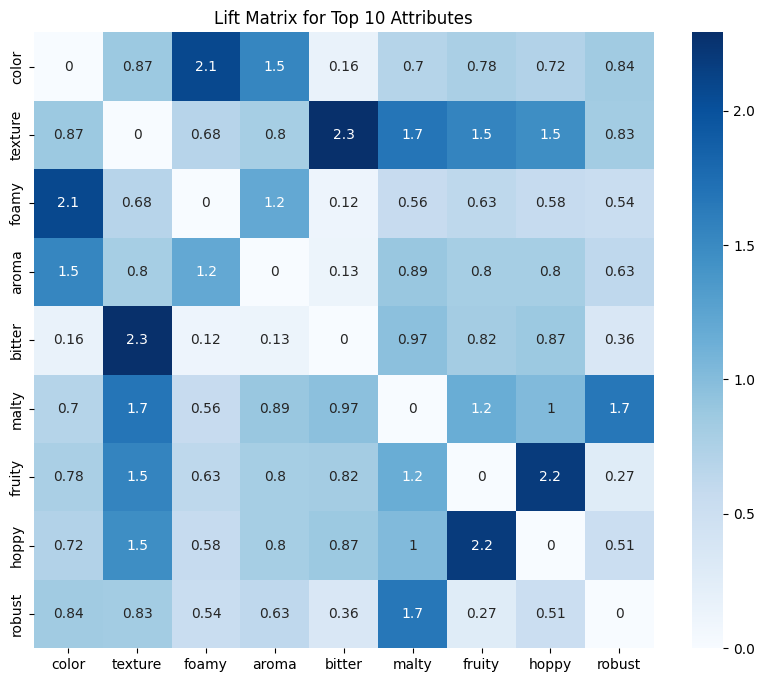

In [ ]:
# Visualize the lift matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(lift_matrix, annot=True, cmap="Blues")
plt.title('Lift Matrix for Top 10 Attributes')
plt.show()

In [ ]:
df.to_csv("mapped_reviews.csv")

# TASK C

In [ ]:
!pip install numpy

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
scraped_data= pd.read_csv('RateBeer Scraped Data.csv')
# Selecting the terms specified by the user for cosine similarity analysis
selected_attributes = ['color', 'aroma', 'foamy']
# Vectorizing the product reviews using a bag-of-words model
vectorizer = CountVectorizer(vocabulary=selected_attributes)
review_vectors = vectorizer.fit_transform(scraped_data['product_review'].fillna('')).toarray()
# The attribute vector is essentially a one-hot encoded vector of the selected terms
attribute_vector = vectorizer.transform([' '.join(selected_attributes)]).toarray()
# Calculate cosine similarity between each review and the attribute vector
similarity_scores = cosine_similarity(review_vectors, attribute_vector).flatten()
# Adding the similarity scores to the scraped_data dataframe
scraped_data['similarity_score'] = similarity_scores
scraped_data=scraped_data
scraped_data.sort_values(by= 'similarity_score', ascending=False).to_csv('similarity_score.csv', index=False)

# TASK D

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer with custom words
sia = SentimentIntensityAnalyzer()
newWords = {'bitter': 2.0, 'sweet': 0,'hazy': 1.0, 'dull': 1.0, 'head': 2.0, 'sweet': 0, 'dark': 1, 'aged': 1, 'pale':1}
sia.lexicon.update(newWords)

# Define the get_sentiment function to use custom scoring
def get_sentiment(sentence):
    score = sia.polarity_scores(sentence)
    compound = score.get('compound')
    return compound

# Perform sentiment analysis on the 'product_review' column using the updated lexicon
scraped_data['compound_score'] = scraped_data['product_review'].apply(get_sentiment)

# Assign sentiment labels based on the updated compound score
scraped_data['sentiment'] = scraped_data['compound_score'].apply(lambda score: 1 if score >0 else (-1 if score < 0 else 0))


# TASK E

In [ ]:
# Export the results to a CSV file
output_file_path = 'output_with_sentiment_updated.csv'  # You can update this to any desired file path
scraped_data[['product_name', 'product_review','similarity_score', 'user_rating', 'sentiment']].to_csv(output_file_path, index=False)


In [ ]:
scraped_data['evaluation_score'] = scraped_data['similarity_score'] * scraped_data['sentiment']


In [ ]:
scraped_data.sort_values(by= 'evaluation_score', ascending=False, inplace= True)
scraped_data.head()

,product_name,product_review,user_rating,similarity_score,compound_score,sentiment,evaluation_score
891,Solhøi 99% Disco,"03.02.2024, tap @ Apollon:\nBig foamy longlast...",3.6,1.000000,0.3182,1,1.000000
389,Schönramer Weißbier Bock,"Dirty orange color with a foamy, white head. C...",3.8,1.000000,0.8439,1,1.000000
542,Bobbi Art Nouveau Geuze,"750ml bottle. Clear golden color. Coconut, sou...",3.7,0.816497,0.3818,1,0.816497
97,Edmund's Oast Sour Blackberry Raspberry,"16 oz can from the local Publix, Greenville. S...",3.7,0.816497,0.4215,1,0.816497
295,Long Table Black Lager,Short pour at the brewery with commonshawn and...,2.7,0.816497,0.7992,1,0.816497


# TASK F

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md

import spacy
# Load spaCy with medium-sized pretrained word vectors
nlp = spacy.load('en_core_web_md')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 18.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load spaCy with medium-sized pretrained word vectors
nlp = spacy.load('en_core_web_md')

# Convert selected attributes into a single string
words_to_compare = ' '.join(selected_attributes)

# Function to calculate word vector similarity between review text and attribute terms
def word_vector_similarity(text1, text2):
    doc1 = nlp(text1)
    doc2 = nlp(text2)
    return doc1.similarity(doc2)

# Apply word vector similarity to reviews in scraped_data
scraped_data['similarity_score_word_vectors'] = scraped_data['product_review'].apply(lambda x: word_vector_similarity(x, words_to_compare))

# Now, compare this to the bag-of-words approach by calculating the percentage of reviews mentioning the attributes
words_to_compare_list = words_to_compare.split(' ')

# Function to calculate the percentage of reviews mentioning the attributes (used in bag-of-words model)
def calculate_percentage_of_reviews_with_attributes(df, words):
    percentages = {}
    for word in words:
        # Use case-insensitive matching for word occurrence
        count = len(df[df['product_review'].str.contains(rf'\b{word}\b', case=False, na=False)])
        percentage = (count / len(df)) * 100
        percentages[word] = percentage
    return percentages

# Calculate percentage of reviews that mention the preferred attributes for both bag-of-words and word vectors
percentages_bow = calculate_percentage_of_reviews_with_attributes(scraped_data, words_to_compare_list)
percentages_word_vectors = calculate_percentage_of_reviews_with_attributes(scraped_data[scraped_data['similarity_score_word_vectors'] > 0.5], words_to_compare_list)

# Display comparison results
print("Percentage of reviews mentioning preferred attributes (Bag-of-Words):", percentages_bow)
print("Percentage of reviews mentioning preferred attributes (Word Vectors):", percentages_word_vectors)

# Compare the top recommendations from both approaches
top_3_bow = scraped_data.sort_values(by='similarity_score', ascending=False).head(3)[['product_name', 'similarity_score']]
top_3_word_vectors = scraped_data.sort_values(by='similarity_score_word_vectors', ascending=False).head(3)[['product_name', 'similarity_score_word_vectors']]

# Display the top 3 recommended products from both approaches
print("Top 3 Recommendations (Bag-of-Words):")
print(top_3_bow)

print("Top 3 Recommendations (Word Vectors):")
print(top_3_word_vectors)


Percentage of reviews mentioning preferred attributes (Bag-of-Words): {'color': 10.437710437710438, 'aroma': 50.37037037037037, 'foamy': 3.5016835016835017}
Percentage of reviews mentioning preferred attributes (Word Vectors): {'color': 19.18158567774936, 'aroma': 75.44757033248082, 'foamy': 7.161125319693094}
Top 3 Recommendations (Bag-of-Words):
                                  product_name  similarity_score
891                           Solhøi 99% Disco          1.000000
389                   Schönramer Weißbier Bock          1.000000
1329  Revolution Double Dry-Hopped Brunch-Hero          0.816497
Top 3 Recommendations (Word Vectors):
                                product_name  similarity_score_word_vectors
159              Point Whole Hog Pumpkin Ale                       0.697409
918  Scantic River Totally Massachusetts Ale                       0.681667
942           Scantic River Hampden Pale Ale                       0.669740


TASK G

In [ ]:
import pandas as pd

In [ ]:
scraped_data= pd.read_csv('RateBeer Scraped Data.csv')

#scraped_data.head()
#scraped_data['product_name'].value_counts()

beer_ratings = scraped_data.groupby('product_name').agg(
    average_user_rating=('user_rating', 'mean'),
    review_count=('user_rating', 'count')
).reset_index()

beer_ratings = beer_ratings.rename(columns={'user_rating': 'average_user_rating'})

# Only considering beers that have multiple reviews
beer_ratings_2 = beer_ratings[beer_ratings['review_count'] > 1]

beer_ratings_2 = beer_ratings_2.sort_values(by='average_user_rating', ascending=False)

beer_ratings_2[:3]

,product_name,average_user_rating,review_count
790,Modern Times Wizard Blend (2019) - Double Bour...,4.366667,6
791,Modern Times Wizard Blend (2019) - Double-Aged...,4.266667,6
746,Marlobobo Stevnsberry - Bourbon BA,4.233333,6


# Comparison with recommendations from similarity and sentiment analysis

Going simply by the average user rating, without any similarity or sentiment analysis, the above 3 beers appear to be the most popular.

However, these are quite unlikely to match the recommendations received from the similarity/sentiment analysis. Recommendations based on average ratings are purely based on general user consensus. Call it the wisdom of the crowd. A beer with a high average rating might not necessarily possess the specific attributes which a user prefers, even though it's generally well-regarded.

On the other hand, the recommendations from the similarity/sentiment analysis are based on specific attributes that match the user's preferences (e.g., malty, hoppy, aroma, taste). Cosine similarity compares how similar the beer descriptions or reviews are to a user’s preferred attributes. Sentiment analysis, could help understand the underlying tone of reviews related to these attributes, identifying beers that are positively associated with them.
This approach focuses on tailoring the recommendations to a user's unique preferences rather than selecting mass-appealing beers.


Let's consider an example. Taking the attributes 'hoppy', 'color', and 'aroma' as our inputs, we run our code to perform the similarity/sentiment analysis and calculate the evaluation scores, and find the top 3 beers based on that criteria.

With this, we get the following recommendations :-

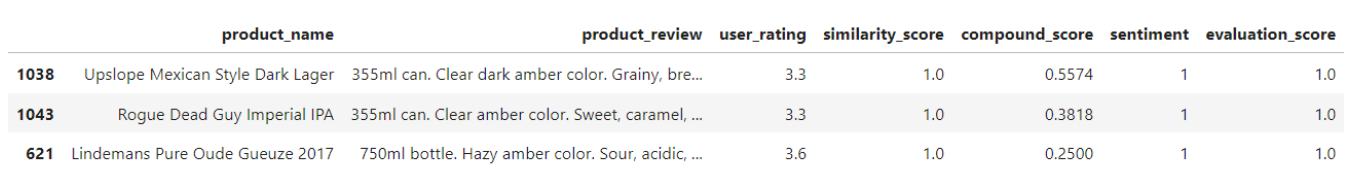

The full review for Upslope Mexican Style Dark Lager reads - "355ml can. Clear dark amber color. Grainy, bready, barley, malty, hoppy, light in aroma/taste."

The full review for Rogue Dead Guy Imperial IPA reads - "355ml can. Clear amber color. Sweet, caramel, malty, sugary, hoppy, oranges, alcohol in aroma/taste."

The full review for Lindemans Pure Oude Gueuze 2017 reads - "750ml bottle. Hazy amber color. Sour, acidic, green apples, fizzy, hoppy in aroma/taste."

Looking at the reviews above, we can see references to the beer's color and aroma, in addition to its hoppy nature. And these references appear to be positive, or neutral at worst. As a result, they score high on the similarity score and decently on the sentiment score. The combined evaluation score puts them at the top of the recommendations for those who are looking for these specific attributes. And this even when their overall user rating is decent at best.


Now if we search our similarity/sentiment analysis results for the beers recommended by the average rating system, we can see that while they're quite highly rated and have positive sentiments attached to them, they don't rank as high in terms of similarity, as the reviews don't seem to mention the desired attributes nearly as much as the previously seen reviews. This lowers their combined evaluation score.

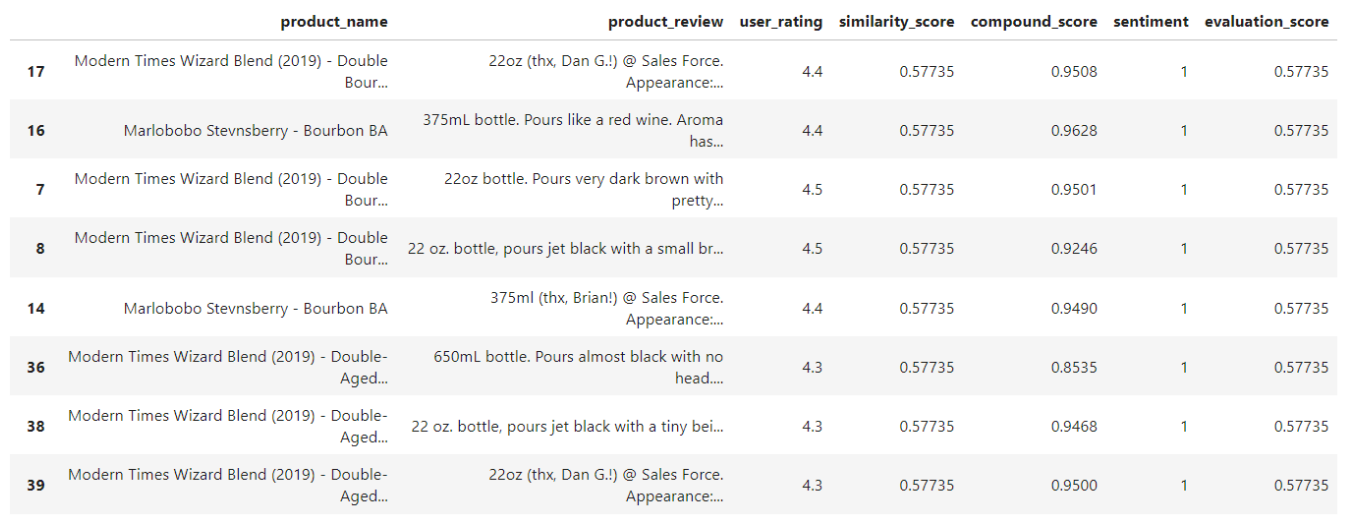

So we can conclude that the recommendation results from these 2 processes won't necessarily match. The options from the average user rating simply give us the most popular beers, whereas the similarity/sentiment analysis recommendations are much more personalized, based on the specified attributes and relying on the user reviews.


TASK H

In [ ]:
import pandas as pd

df = pd.read_csv("mapped_reviews.csv")

beer_list = df["product_name"].value_counts()[:5].index.tolist()

attribute_list = ["color", "texture", "foamy"]

dict1 = {"color":0,"texture":0,"foamy":0}

for i in range(len(df)):
    if "color" in df["mapped_review"][i].split():
        dict1["color"] += 1
for j in range(len(df)):
    if "texture" in df["mapped_review"][j].split():
        dict1["texture"] += 1
for k in range(len(df)):
    if "foamy" in df["mapped_review"][k].split():
        dict1["foamy"] += 1

co_occurrence_matrix = pd.DataFrame(0, index=beer_list, columns=attribute_list)

for beer in beer_list:
    beer_reviews = df[df["product_name"] == beer]["mapped_review"]
    for attribute in attribute_list:
        for review in beer_reviews:
            if attribute in review.split():
                co_occurrence_matrix.loc[beer, attribute] += 1


lift_matrix = pd.DataFrame(0, index=beer_list, columns=attribute_list)
for beer in beer_list:
    for attr in attribute_list:
        lift_matrix.loc[beer,attr] = (len(df)*co_occurrence_matrix.loc[beer,attr])/(len(df[df["product_name"]==beer])*dict1[attr])

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_matrix = pd.DataFrame(cosine_similarity(lift_matrix), index=lift_matrix.index, columns=lift_matrix.index)

cosine_sim_modified = cosine_sim_matrix.copy()
for i in range(len(cosine_sim_matrix)):
    cosine_sim_modified.iloc[i,i] = -2

most_similar_beers = cosine_sim_modified.idxmax()

most_similar_df = pd.DataFrame({'Most Similar Beer': most_similar_beers.values}, index = most_similar_beers.index, )

<ipython-input-22-ec42264aab4e>:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.1058981233243967' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  lift_matrix.loc[beer,attr] = (len(df)*co_occurrence_matrix.loc[beer,attr])/(len(df[df["product_name"]==beer])*dict1[attr])
<ipython-input-22-ec42264aab4e>:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7180851063829787' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  lift_matrix.loc[beer,attr] = (len(df)*co_occurrence_matrix.loc[beer,attr])/(len(df[df["product_name"]==beer])*dict1[attr])
<ipython-input-22-ec42264aab4e>:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5340909090909092' has dtype incompatibl

In [ ]:
lift_matrix

,color,texture,foamy
Grassroots Soigné - Raspberry,1.105898,0.718085,1.534091
Marlobobo Stevnsberry - Bourbon BA,0.884718,0.957447,0.767045
Floodland Chardonnay - MMXXII,1.327078,0.718085,1.534091
"Modern Times / J. Wakefield Deeds & Exploits - Coconut, Coffee & Vanilla",1.327078,1.196809,1.534091
Modern Times Wizard Blend (2019) - Double-Aged in Schmillett Bourbon Barrels,1.327078,0.718085,1.534091


In [ ]:
beer_input = input("Beer:")
print("Most similar beer is:",most_similar_df.loc[beer_input.strip()]["Most Similar Beer"])

Beer:Grassroots Soigné - Raspberry
Most similar beer is: Floodland Chardonnay - MMXXII


### **Methodology and Logic**
- **Chose three attributes and five beers**: We selected three attributes based on their frequency of appearance in reviews. This ensures that the attributes chosen are representative and relevant to the majority of customer feedback. Additionally, we focused on the top 5 beers that had the highest number of reviews, ensuring there is enough data to compare these beers meaningfully.

- **Calculated co-occurrences**: For each of the selected attributes, we calculated how often they co-occurred with each beer in the reviews. This step establishes a relationship between beers and attributes by quantifying how frequently certain attributes are mentioned alongside a particular beer.

- **Created a lift matrix**: Lift values were calculated between each beer and each attribute. The lift value measures how much more likely a specific attribute is to appear in reviews for a particular beer compared to how frequently that attribute appears overall. A lift greater than 1 indicates that the attribute is more strongly associated with the beer than would be expected by chance. The result is a 5x3 lift matrix (5 beers and 3 attributes).

- **Cosine similarity calculation**: Each beer is represented as a vector of three lift values (one for each attribute). We then calculated the cosine similarity between every pair of beers using their lift vectors. Cosine similarity measures the angle between two vectors, indicating how similar the two beers are based on their attribute associations. A cosine value closer to 1 indicates greater similarity.

- **Returning the most similar beer**: When a user inputs any of the five beers, the system calculates and compares the cosine similarity values between the input beer and the other four beers. The beer with the highest cosine similarity is returned as the most similar beer.

- **Example**: For instance, the most similar beer to "Grassroots Soigné - Raspberry" based on the cosine similarity of the attribute vectors is "Floodland Chardonnay - MMXXII." This similarity is determined by the closest match of their lift values.